# Unsupervised Learning - Clustering & PCA

**PCA** tries to find a new set of axes (the principal components) that best describe the spread of this cloud. The first axis points in the direction of the most spread, the second axis (perpendicular to the first) points in the direction of the next most spread, and so on.

**How PCA works**:

* **Standardization**: The data is often standardized (mean is subtracted, and it's divided by the standard deviation) to ensure that all features contribute equally to the analysis, regardless of their original scale.

* **Covariance Matrix**: PCA calculates the covariance matrix of the standardized data. This matrix shows the relationships and the amount of variance between each pair of features.

* **Eigen Decomposition**: The algorithm then computes the eigenvectors and eigenvalues of the covariance matrix.
 * **Eigenvectors** represent the directions (or principal components) in the data with the most variance.
 * **Eigenvalues** indicate the magnitude of the variance explained by each corresponding eigenvector. Higher eigenvalues correspond to more important principal components.

* **Selecting Principal Components**: The eigenvectors are sorted based on their eigenvalues in descending order. The top k eigenvectors (where k is the desired lower dimensionality) are selected as the principal components. The choice of k often involves analyzing the explained variance ratio to decide how many components to keep to retain a significant portion of the original information.
* **Projection**: The original data is then projected onto the subspace spanned by the selected principal components, creating a new, lower-dimensional dataset.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # Principle Component Analysis
from sklearn.preprocessing import StandardScaler

np.random.seed(150)  # Set seed for reproducibility


## Illinois Clustering Example

Note:  This is a dataset about zip codes in Illinois
The data contains information about the locations of each zip code
in latitude and longitude of its center as well as population and
population density (per square mile).  

In [ ]:
# Read in Illinois zip code data (lat, long, population, density)
# Load Illinois zip code data
IL_data = pd.read_excel('unsupervised learning/illinois_zip_codes_data.xlsx', header=0) # header row contains column name. Alternatively, header=none or header=2
lat = IL_data.iloc[:, 3].to_numpy() # the 4th column which is 3rd data column.
long = IL_data.iloc[:, 4].to_numpy()
pop = IL_data.iloc[:, 1].to_numpy()
dens = IL_data.iloc[:, 2].to_numpy()


Running code above, error occured as "No such file or directory: 'Unsupervised Learning/illinois_zip_codes_data.xlsx'". It seems the data file was missing in folder.

# First plot the locations in (lat, long)

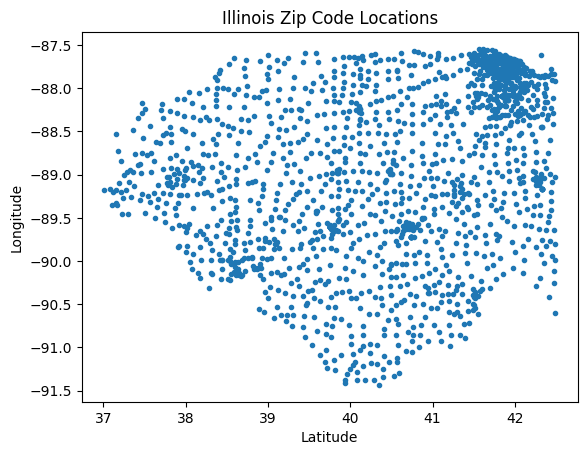

In [ ]:
plt.figure()
plt.plot(lat, long, '.')
plt.title("Illinois Zip Code Locations")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


## Geographic K-Means by latitude and longitude:

Next try to cluster the zip codes based solely on geographic location.

    kmeans = KMeans(n_clusters=20).fit(np.column_stack((x, y)))
    IDX = kmeans.labels_

To perform KMeans on the (lat,long), replacing x/y as lat/long specifically according to the previous code definition.

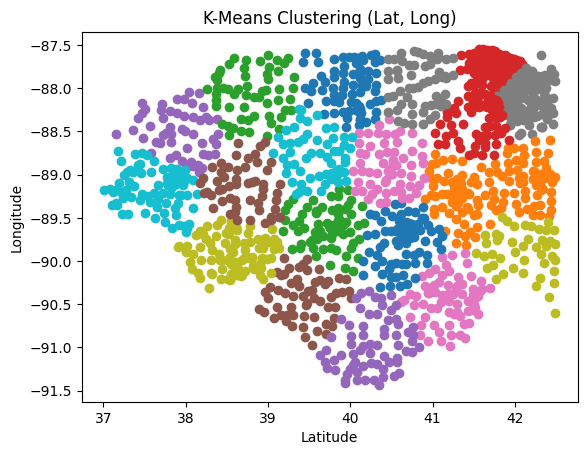

In [ ]:
kmeans = KMeans(n_clusters=20).fit(np.column_stack((lat, long)))
IDX = kmeans.labels_

# Plot k-means result
plt.figure()
for i in range(20):
    plt.plot(lat[IDX == i], long[IDX == i], '.', markersize=12)
plt.title("K-Means Clustering (Lat, Long)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


## K-Means with Populatuiobn Density:

Next try to cluster the zip codes based solely on geographic location.

    kmeans = KMeans(n_clusters=20).fit(np.column_stack((x, y, z)))
    IDX = kmeans.labels_

To perform KMeans on the (lat,long, dens), replacing x/y/z as lat/long specifically according to the previous code definition.

IDX creates index on the Kmean produced clusters as 0-19, for this example in paricular. All observations are placed in their clusters per this IDX numbers.

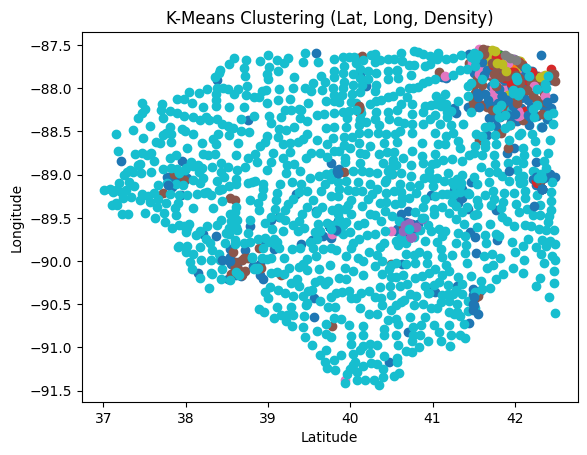

In [ ]:
# Cluster zip codes using latitude, longitude, and population density
# Cluster using geographic location and population density
kmeans = KMeans(n_clusters=20).fit(np.column_stack((lat, long, dens)))
IDX = kmeans.labels_

plt.figure()
for i in range(20):
    plt.plot(lat[IDX == i], long[IDX == i], '.', markersize=12)
plt.title("K-Means Clustering (Lat, Long, Density)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


The plot indicates that population density is quite important of a
variable for determinining the clusters.  Geographic location less so.
The partition hardly reflects geographic distance.  This is likely because
the **scale of variation** (the range of possible values) is larger for
population density than for either latitude or longitude.

## KMeans with Standardized Density

Calculate standard deviations to normalize all variables so that
population density has a similar scale as latitude and longitude.
* stdev_dens= sqrt(var(dens));
* stdev_lat=sqrt(var(lat));
* stdev_long = sqrt(var(long));
* stdev_geo = sqrt(stdev_lat^2 + stdev_long^2);

Note: standard deviation of population density is calculated as usual: as the square root of the variance of population density.  **The standard
deviation of geographic locations is not so common.  This is to take into
account the fact that geographically, latitude and longitude should be
scaled by the same amount**.  Therefore, a version of "circular" standard
deviation is calculated.  Note that this will not differ from either the
standard deviation of latitude or longitude by too much as the range of
values for latitude in Illinois is about half of the range of values
of longitude in Illinois.

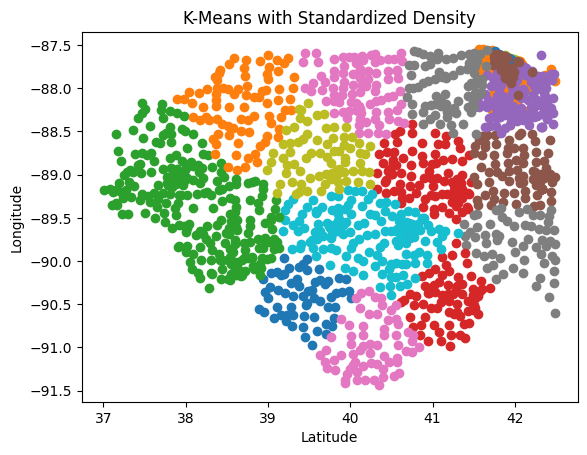

In [ ]:
# Perform k-means with the standardized data
stdev_dens = np.std(dens)
stdev_lat = np.std(lat)
stdev_long = np.std(long)
stdev_geo = np.sqrt(stdev_lat**2 + stdev_long**2)

X_standardized = np.column_stack((lat, long, dens / stdev_dens))
kmeans = KMeans(n_clusters=20).fit(X_standardized)
IDX = kmeans.labels_

plt.figure()
for i in range(20):
    plt.plot(lat[IDX == i], long[IDX == i], '.', markersize=12)
plt.title("K-Means with Standardized Density")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


Note now that both geography as well as population density seem to be
reflected in the partition delivered by k-means

## Runing K for KMeans

Next, consider the choice of k.  The choice 20 was an arbitrary starting
point.  Depending on both the application as well as properties of the
data, a different k might be better.  Next try another choice: 40

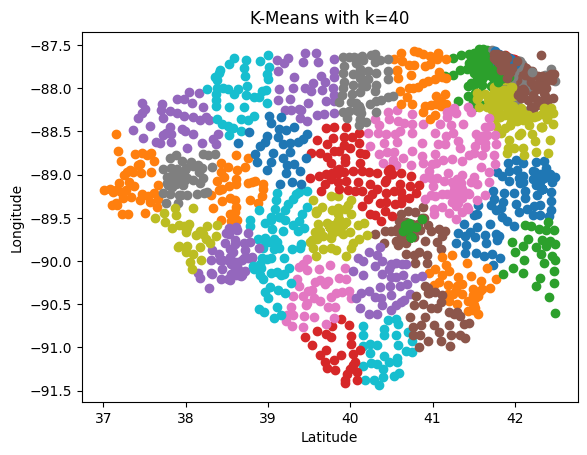

In [ ]:
# Try a larger number of clusters (k=40)
# Explore clustering for k=40
kmeans = KMeans(n_clusters=40).fit(X_standardized)
IDX = kmeans.labels_

plt.figure()
for i in range(40):
    plt.plot(lat[IDX == i], long[IDX == i], '.', markersize=12)
plt.title("K-Means with k=40")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


## Finding the Elbow of K Values.

In fact, one might try all possible number of k, from 1 to 100.

When slope of tangent line is 1, K reaches elbow value.

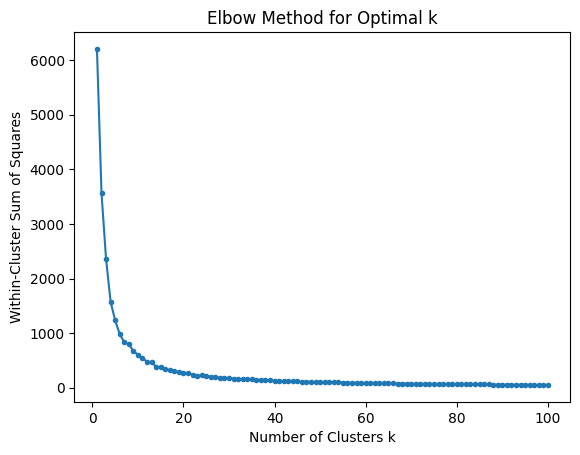

In [ ]:
# Use elbow method to determine optimal number of clusters
SUMD_allk = []
for k in range(1, 101):
    km = KMeans(n_clusters=k).fit(X_standardized)
    SUMD_allk.append(km.inertia_)

plt.figure()
plt.plot(range(1, 101), SUMD_allk, '.-')
plt.xlabel("Number of Clusters k")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Elbow Method for Optimal k")
plt.show()


The elbow K=7 in this case. Plot K=4, see clear Chicago and Springfield on chart.

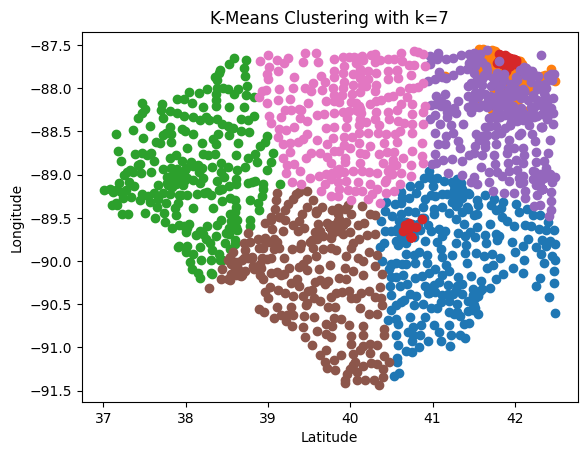

In [ ]:
# Plot clustering result for k=7
kmeans = KMeans(n_clusters=7).fit(X_standardized)
IDX = kmeans.labels_

plt.figure()
for i in range(7):
    plt.plot(lat[IDX == i], long[IDX == i], '.', markersize=12)
plt.title("K-Means Clustering with k=7")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


## Rotating the Map 45 Degree to respect N-S Orientation

Next, try to modify the distance to respect north-south orientation.  
This orientation is not so important far outside of Chicago, although
I-57 does indeed run largely north-south. Within Chicago, the street
grid is dominated by north-south running streets.  For this use
sup distance.  This is not natively programmed.  Fortunately, one can
accomplish the same calculation by rotating Illinois 45 degrees
counterclockwise and applying Manhattan distance.  These are equivalent.

To rotate 45 degrees apply the following rotation matrix to the right.

**------self note------**

### Rotating Vectors

Vector rotation is a fundamental concept in various fields, from computer graphics to physics. Let's explore how to rotate vectors in two and three dimensions.

**Two-Dimensional Rotation**

  In a 2D plane, you can rotate a vector $\mathbf{v} = \begin{pmatrix} x \\ y \end{pmatrix}$ counterclockwise by an angle $\theta$ using a rotation matrix $\mathbf{R}$:

  $$\mathbf{R}(\theta) = \begin{pmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{pmatrix}$$

  The rotated vector $\mathbf{v}'$ is then given by:

  $$\mathbf{v}' = \mathbf{R}(\theta) \mathbf{v} = \begin{pmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} x \cos \theta - y \sin \theta \\ x \sin \theta + y \cos \theta \end{pmatrix}$$

  **In simpler terms:** If you have a vector with components $(x, y)$ and you want to rotate it counterclockwise by an angle $\theta$, the new components $(x', y')$ will be:

  * $x' = x \cos \theta - y \sin \theta$
  * $y' = x \sin \theta + y \cos \theta$

  To rotate clockwise by an angle $\theta$, you can simply use $-\theta$ in the rotation matrix or the equations above.

**Three-Dimensional Rotation**

  Rotating a vector in 3D requires specifying the axis of rotation. Common rotations are around the x, y, and z axes.

  Let $\mathbf{v} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$ be the vector you want to rotate.

  **Rotation around the x-axis by an angle $\alpha$:**

  $$\mathbf{R}_x(\alpha) = \begin{pmatrix} 1 & 0 & 0 \\ 0 & \cos \alpha & -\sin \alpha \\ 0 & \sin \alpha & \cos \alpha \end{pmatrix}$$

  The rotated vector $\mathbf{v}' = \mathbf{R}_x(\alpha) \mathbf{v} = \begin{pmatrix} x \\ y \cos \alpha - z \sin \alpha \\ y \sin \alpha + z \cos \alpha \end{pmatrix}$

  **Rotation around the y-axis by an angle $\beta$:**

  $$\mathbf{R}_y(\beta) = \begin{pmatrix} \cos \beta & 0 & \sin \beta \\ 0 & 1 & 0 \\ -\sin \beta & 0 & \cos \beta \end{pmatrix}$$

  The rotated vector $\mathbf{v}' = \mathbf{R}_y(\beta) \mathbf{v} = \begin{pmatrix} x \cos \beta + z \sin \beta \\ y \\ -x \sin \beta + z \cos \beta \end{pmatrix}$

  **Rotation around the z-axis by an angle $\gamma$:**

  $$\mathbf{R}_z(\gamma) = \begin{pmatrix} \cos \gamma & -\sin \gamma & 0 \\ \sin \gamma & \cos \gamma & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

  The rotated vector $\mathbf{v}' = \mathbf{R}_z(\gamma) \mathbf{v} = \begin{pmatrix} x \cos \gamma - y \sin \gamma \\ x \sin \gamma + y \cos \gamma \\ z \end{pmatrix}$$


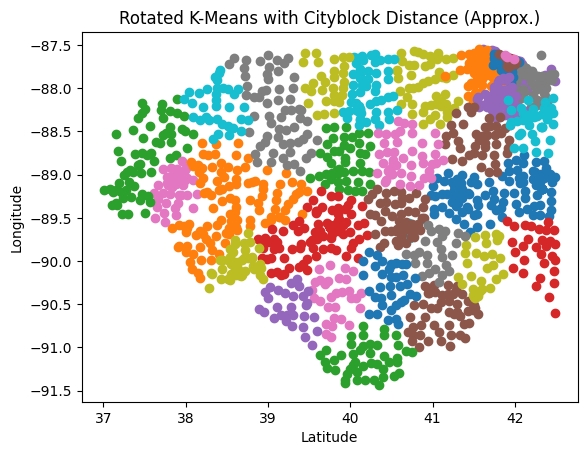

In [ ]:
# Rotation is multiply the data by a unit 45 degress vector.
R = np.dot(np.column_stack((lat, long)), np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                                                   [np.sin(np.pi/4), np.cos(np.pi/4)]]))
X_rotated = np.column_stack((R[:, 0] / stdev_long, R[:, 1] / stdev_long, dens / stdev_dens))

# Approximate cityblock distance using rotation
kmeans = KMeans(n_clusters=40).fit(X_rotated)
IDX = kmeans.labels_

plt.figure()
for i in range(40):
    plt.plot(lat[IDX == i], long[IDX == i], '.', markersize=12)
plt.title("Rotated K-Means with Cityblock Distance (Approx.)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


Note: The plot preserves the shape of Illinois largely, but creates
archipelago out of Chicago and an Island out of Springfield.

## PCA (Principal Components) Analysis

Note, there are two important aspects of principal components.  First, it
reduces the data to a lower dimensional representation, which also means
that distances (variances) are better behaved.  Second, it allows for visual
inspection.

**Exercise**:A good exercise is to go through all of the above steps, but now include either of the following variables: (1) pop, (2) log[max(1,pop)]

**Question**: What are the advantages of including this variables?  Are there
disadvantages?  Why is the possibility of having population
log-transformed important to consider?  Would it be useful to create more transformations, or even interactions of the variables?

**Frank Answer**:

* **Advantages of Including Pop**: 1) Capturing Scale and Magnitude; 2)Potentially Defining a Major Axis of Variation; 3) Contextualizing Density
* **Disadvantages of Including Population**: 1) Scale Dominance; 2) Skewness and Outliers; 3) Non-Linear Relationships.
* **Importance of Log-Pop**: Using a log-pop, log[max(1,pop)], is crucial for several reasons: 1) Addressing Skewness; 2) Mitigating Scale Dominance; 3) Potentially Linearizing Relationships.
* **More Log-transform**: could help caturing linearity and engineering meaningful features, but risk in overfitting and reducing interpretability.

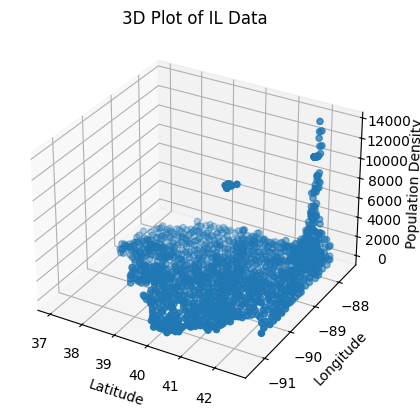

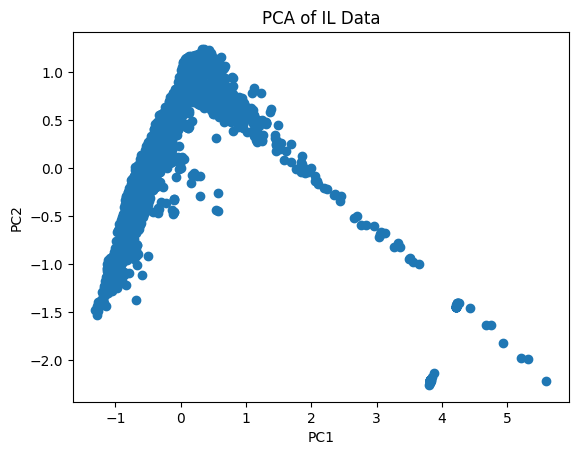

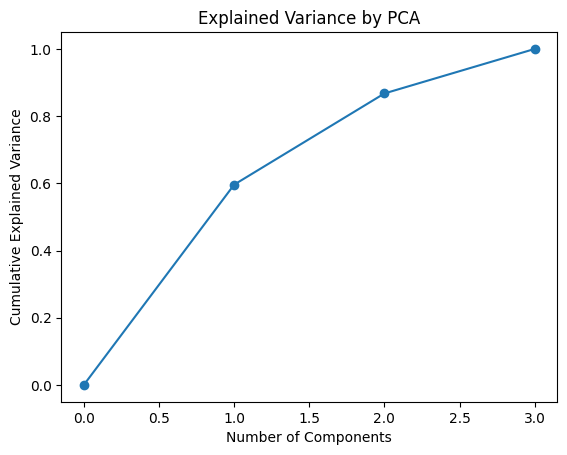

In [ ]:
# Standardize lat and long by stdev_geo, instead of by stdev_lat and stdev_long respectively.
X_pca = np.column_stack(((lat - np.mean(lat)) / stdev_geo,
                         (long - np.mean(long)) / stdev_geo,
                         (dens - np.mean(dens)) / stdev_dens))
pca = PCA(n_components=3)
U = pca.fit_transform(X_pca)

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lat, long, dens, s=20)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Population Density')
plt.title("3D Plot of IL Data")
plt.show()

# Plot first two PCs
plt.figure()
plt.plot(U[:, 0], U[:, 1], '.', markersize=12)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of IL Data")
plt.show()

# Explained variance
explained = np.insert(np.cumsum(pca.explained_variance_ratio_), 0, 0)
plt.figure()
plt.plot(range(4), explained, '.-', markersize=12) # range(4) gives numbers 0-1-2-3
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA")
plt.show()


# Unsupervised learning: Recommendation

## Swisswine Example

In [ ]:
# Load Swiss wine data: acidity, sugar, alcohol, wine names
# Load Swiss wine data
Wine_data = pd.read_csv('Unsupervised Learning/memoire_wines_data.csv', encoding='latin1').dropna()
acid = Wine_data.iloc[:, 2].to_numpy()
sugar = Wine_data.iloc[:, 3].to_numpy()
alc = Wine_data.iloc[:, 1].to_numpy()
wine_names = Wine_data.iloc[:, 0]
n = len(alc)


Note:  This is a dataset about memoire wines taken from https://www.memoire.wine/de/home/
The data contains information about a subsample of a collection of wines made by a club
of wine makers in Switzerland.  The fields recorded here are
Alcohol by volume (alc)
Residual sugar (sugar)
Acidity (acid)
Year
Region

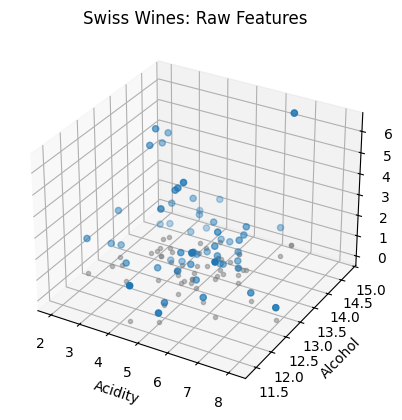

In [ ]:
# Plot data in 3D for visual inspection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(acid, alc, sugar, s=20)
ax.plot(acid, alc, [0]*n, '.', color='gray', alpha=0.5)
ax.set_xlabel("Acidity")
ax.set_ylabel("Alcohol")
ax.set_zlabel("Residual Sugar")
plt.title("Swiss Wines: Raw Features")
plt.show()


Apply PCA and plot the first two components.

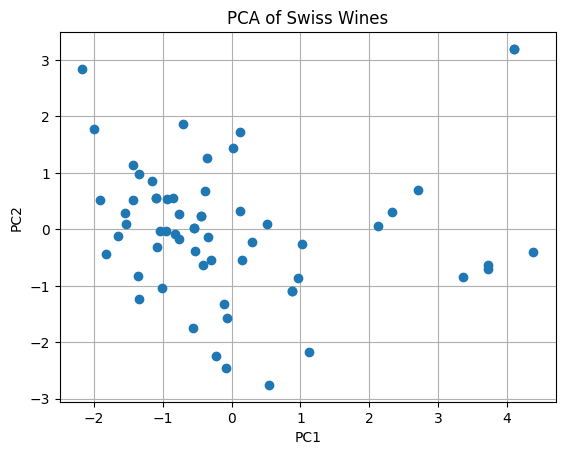

In [ ]:
X_wine = np.column_stack((acid, alc, sugar))
pca = PCA(n_components=2)
U = pca.fit_transform(X_wine)

plt.figure()
plt.plot(U[:, 0], U[:, 1], '.', markersize=12)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Swiss Wines")
plt.grid(True)
plt.show()


cluster with kmeans - in this example, because the number of variables is 3 which is relatively
small, k-means is done on the full dataset (without dimension reduction).  Calculate for k = 5, 10,
15.

In [ ]:
IDX5 = KMeans(n_clusters=5).fit_predict(X_wine)
IDX10 = KMeans(n_clusters=10).fit_predict(X_wine)
IDX20 = KMeans(n_clusters=20).fit_predict(X_wine)


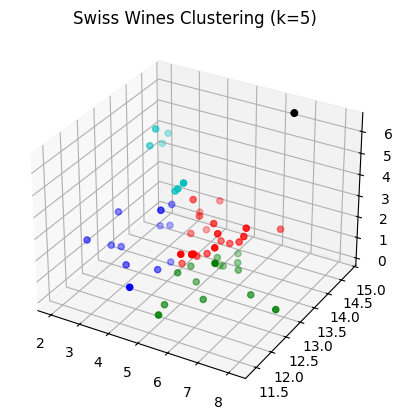

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['b', 'r', 'c', 'g', 'k']
for i in range(5):
    x = acid[IDX5 == i]
    y = alc[IDX5 == i]
    z = sugar[IDX5 == i]
    ax.scatter(x, y, z, color=colors[i], s=20)
plt.title("Swiss Wines Clustering (k=5)")
plt.show()


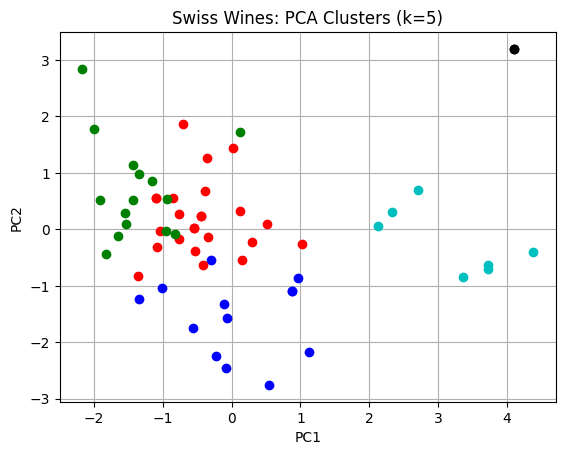

In [ ]:
# Plot PCA projections of clusters (k=5)
plt.figure()
for i in range(5):
    plt.plot(U[IDX5 == i, 0], U[IDX5 == i, 1], '.', color=colors[i], markersize=12)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Swiss Wines: PCA Clusters (k=5)")
plt.grid(True)
plt.show()


Make recommendations:
Suppose that a customer rates the 2021 Pinot Noir from 'Weingut Kastanienbaum AG' highly -
This wine is record number 52 in the dataset

Find cluster corresponding to the record number for k=5,10,15

In [ ]:
# Recommend similar wines based on cluster membership
rec = 52

i5 = IDX5[rec]
i10 = IDX10[rec]
i20 = IDX20[rec]

print("Recommendations using k=5:")
print(Wine_data.iloc[(IDX5 == i5) & (Wine_data.index != rec), [0, 4, 5, 6]])

print("\nRecommendations using k=10:")
print(Wine_data.iloc[(IDX10 == i10) & (Wine_data.index != rec), [0, 4, 5, 6]])

print("\nRecommendations using k=20:")
print(Wine_data.iloc[(IDX20 == i20) & (Wine_data.index != rec), [0, 4, 5, 6]])


Recommendations using k=5:
                           Winery    Rebsorte  Jahrgang            Region
13            Castello di Morcote      Merlot    2020.0            Tessin
15                        Wegelin  Pinot Gris    2022.0    Deutschschweiz
19                    Schmidheiny  Pinot Noir    2022.0    Deutschschweiz
41   Domaine de La Maisone Carree  Pinot Noir    2020.0  Drei-Seen-Region
43          Domaine Saint-Sebaste   Chasselas    2021.0  Drei-Seen-Region
47        Weingut Krebs + Steiner  Chardonnay    2022.0  Drei-Seen-Region
51                  Azienda Mondo     Bondola    2022.0            Tessin
55    Zuendel Azienda Agricola SA      Merlot    2020.0            Tessin
57                   Moncucchetto  Chardonnay    2020.0            Tessin
103           Weingut zum Sternen  Pinot Noir    2021.0    Deutschschweiz
105      Weingut Kastanienbaum AG  Pinot Noir    2021.0    Deutschschweiz
111          Schlossgut Bachtobel  Pinot Noir    2021.0    Deutschschweiz
113        